# Data munging

In [ ]:
import pandas as pd
import re
from sklearn.utils import shuffle

In [2]:
df_all = pd.read_csv("../data/all_english_audible.csv")

In [5]:
df_new = pd.read_csv("../data/audible_new_books_05122020.csv")

## df_all clean

In [6]:
# Get all rows with NA asin
df_all_na_asin = df_all[df_all['asin'].isna()]

In [7]:
# Function to extract asin from link
def extract_asin(link):
    #Capture the pattern of asin
    match = re.search(r'/(\w+)\?', link)
    if match:
        return match.group(1)
    return None

In [8]:
# Extract asin from link
df_all_na_asin['asin'] = df_all_na_asin['link'].apply(extract_asin)

/var/folders/3f/2_syl7793_j_c413yxmzlq980000gn/T/ipykernel_97325/1366719223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_na_asin['asin'] = df_all_na_asin['link'].apply(extract_asin)


In [9]:
df_all.update(df_all_na_asin)

In [10]:
#df_all for merge
df_all_asin_merge = df_all[['asin', 'author', 'title', 'narrator','length', 'category']]

In [12]:
len(df_all_asin_merge)

460544

## df_new clean

In [13]:
# Function to clean asin
def extract_asin(asin_str):
    # If in the list format
    if asin_str.startswith('['):
        # Split by comma, and take the third element 
        asin_parts = [part.strip(" '") for part in asin_str.split("', '")]
        return asin_parts[2] if len(asin_parts) > 2 else None
    else:
        return asin_str

df_new['asin'] = df_new['asin'].apply(extract_asin)
df_new

,Unnamed: 0,asin,link,title,subtitle,author_name,author_link,narrator_name,narrator_link,length,date,language,rating,rating_count,price,category,page_number
0,0,1094129747,/pd/2PAC-in-the-Studio-Audiobook/1094129747?qi...,2PAC in the Studio,The Stories Behind the Greatest Hits,Jake Brown,/search?searchAuthor=Jake+Brown&ref=a_search_c...,Jake Brown,/search?searchNarrator=Jake+Brown&ref=a_search...,7 hrs,06-29-21,English,Not rated yet,Not rated yet,$23.07,Arts & Entertainment,1
1,1,1094093971,/pd/Scientists-of-Sound-Vol-2-Audiobook/109409...,"Scientists of Sound, Vol. 2",The 80s!,Jake Brown,/search?searchAuthor=Jake+Brown&ref=a_search_c...,Jake Brown,/search?searchNarrator=Jake+Brown&ref=a_search...,10 hrs,03-30-21,English,Not rated yet,Not rated yet,$24.47,Arts & Entertainment,1
2,2,059315603X,/pd/They-Dont-Dance-No-Mo-Audiobook/059315603X...,They Don't Dance No Mo',NaN,Hanif Abdurraqib,/author/Hanif-Abdurraqib/B07JVM42M1?ref=a_sear...,NaN,NaN,10 hrs,03-23-21,English,Not rated yet,Not rated yet,$28.00,Arts & Entertainment,1
3,3,0062988611,/pd/Shame-Audiobook/0062988611?qid=1589313846&...,Shame,NaN,Jameela Jamil,/search?searchAuthor=Jameela+Jamil&ref=a_searc...,NaN,NaN,12 hrs,03-02-21,English,Not rated yet,Not rated yet,$28.51,Arts & Entertainment,1
4,4,0062958771,/pd/The-Whole-Truth-Audiobook/0062958771?qid=1...,The Whole Truth,The Reality of It All,Kim Richards,/search?searchAuthor=Kim+Richards&ref=a_search...,NaN,NaN,12 hrs,02-15-21,English,Not rated yet,Not rated yet,$30.79,Arts & Entertainment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17885,17885,B085WD5RBB,/pd/Brothers-of-the-Flame-Audiobook/B085WD5RBB...,Brothers of the Flame,"An Ariel Kimber Novel, Volume 1",Mary Martel,/author/Mary-Martel/B013C4UTGU?ref=a_search_c3...,Melissa Schwairy,/search?searchNarrator=Melissa+Schwairy&ref=a_...,8 hrs and 18 mins,03-16-20,English,4.5 out of 5 stars,22 ratings,$19.95,Teens,24
17886,17886,1773055232,/pd/When-Morning-Comes-Audiobook/1773055232?qi...,When Morning Comes,NaN,Arushi Raina,/author/Arushi-Raina/B01JWR1834?ref=a_search_c...,"Jamie Bloch,John Fleming,Patience Mpumlwana,To...",/search?searchNarrator=Jamie+Bloch&ref=a_searc...,6 hrs and 20 mins,03-16-20,English,5 out of 5 stars,1 rating,$13.99,Teens,24
17887,17887,B085WBYSYQ,/pd/Alumni-A-Divine-Dungeon-Series-Audiobook/B...,Alumni: A Divine Dungeon Series,"Artorian's Archives, Book 2","Dennis Vanderkerken,Dakota Krout",/author/Dennis-Vanderkerken/B07ZQTZLHG?ref=a_s...,Travis Baldree,/search?searchNarrator=Travis+Baldree&ref=a_se...,13 hrs and 58 mins,03-14-20,English,5 out of 5 stars,650 ratings,$24.95,Teens,24
17888,17888,B085QNL9SN,/pd/Dead-America-Mississippi-Audiobook/B085QNL...,Dead America: Mississippi,"Dead America: The Second Week, Book 1",Derek Slaton,/author/Derek-Slaton/B00IXQZKKI?ref=a_search_c...,P. J. Morgan,/search?searchNarrator=P.+J.+Morgan&ref=a_sear...,1 hr and 46 mins,03-14-20,English,5 out of 5 stars,2 ratings,$6.95,Teens,24


In [14]:
# Rename to match 2 DataFrame
df_new.rename(columns={"author_name": "author", "narrator_name": "narrator"}, inplace=True)

In [15]:
# df new for merge
df_new_asin_merge = df_new[['asin', 'author', 'title', 'narrator', 'length', 'category']]

In [17]:
len(df_new_asin_merge)

17890

# merge data

In [18]:
# Merge 2 DataFrames
merged_df = pd.concat([df_all_asin_merge, df_new_asin_merge])

### Merge drop dup asin clean

In [19]:
# Drop asin duplicate
drop_dup_df = merged_df.drop_duplicates(subset='asin', keep='first')
print(len(drop_dup_df))

385396


### Merge drop NA and multi narrator

In [20]:
drop_dup_df = drop_dup_df[drop_dup_df['narrator'].notna()]
print(len(drop_dup_df))

375504


In [21]:
drop_dup_df = drop_dup_df[~drop_dup_df['narrator'].str.contains(',')]
print(len(drop_dup_df))

346225


## Filter Category

In [36]:
# Print all contained categories
drop_dup_df["category"].unique()

array(['Arts & Entertainment', 'Bios & Memoirs', 'Business', 'Classics',
       'Erotica & Sexuality', 'Fiction', 'History',
       'Mysteries & Thrillers', 'Romance', 'Science & Technology',
       'Sci-Fi & Fantasy', 'Self Development', 'Comedy',
       'Newspapers & Magazines', 'Nostalgia Radio', 'Radio & TV',
       'Sports', 'Travel & Adventure', 'Religion & Spirituality',
       'Nonfiction', 'Live Events', 'Language Instruction',
       'Drama & Poetry', 'Health & Fitness', 'Kids', 'Teens'],
      dtype=object)

In [50]:
# Filter DataFrame down to only 6 chosen genres
genres_df = drop_dup_df[drop_dup_df["category"].isin(["Bios & Memoirs", "Business", "History", "Mysteries & Thrillers", "Sci-Fi & Fantasy", "Romance"])]
len(genres_df)

139510

# Length clean

In [54]:
# Function to convert length to minutes
def convert_to_minutes(time_str):
    if not isinstance(time_str, str):
        return None  

    time_parts = time_str.split(' ')
    minutes = 0
    if 'hr' in time_str or 'hrs' in time_str:
        hours_index = time_parts.index('hrs') if 'hrs' in time_parts else time_parts.index('hr')
        minutes += int(time_parts[hours_index - 1]) * 60  # Convert hours to minutes
    
    if 'min' in time_str or 'mins' in time_str:
        minutes_index = time_parts.index('mins') if 'mins' in time_parts else time_parts.index('min')
        minutes += int(time_parts[minutes_index - 1])
    
    return minutes

In [55]:
genres_df['length'] = genres_df['length'].apply(convert_to_minutes)

/var/folders/3f/2_syl7793_j_c413yxmzlq980000gn/T/ipykernel_97325/2662082109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_df['length'] = genres_df['length'].apply(convert_to_minutes)


In [56]:
#Drop NA
genres_df = genres_df[genres_df['length'].notna()]

#Drop 'length': "Not Yet Known"
genres_df = genres_df[genres_df['length'] != "Not Yet Known"]

## Length histogram

In [53]:
import matplotlib.pyplot as plt

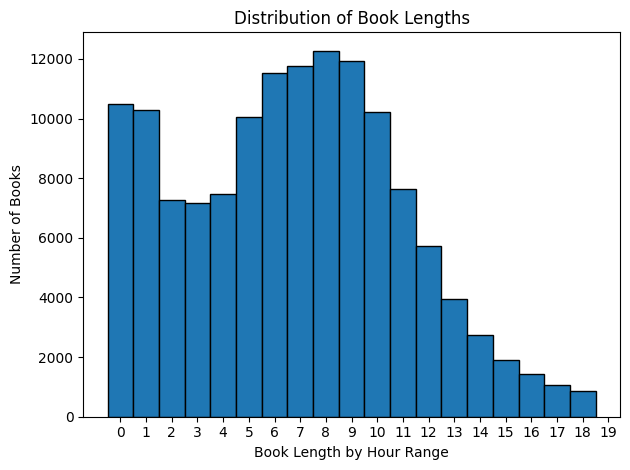

In [58]:
# Convert minutes into hours
genres_df['length_in_hours'] = genres_df['length'] / 60

# Define the bin edges for the histogram
bin_edges = range(0, 20)  

# Create the histogram
plt.hist(genres_df['length_in_hours'], bins=bin_edges, edgecolor='black', align='left')

# Set the ticks to be at the edges of each bin
plt.xticks(bin_edges)

# Set the labels and title
plt.xlabel('Book Length by Hour Range')
plt.ylabel('Number of Books')
plt.title('Distribution of Book Lengths')

# Optimize space to accommodate x-labels
plt.tight_layout()

# Show the plot
plt.show()

## Cut down based on length

In [67]:
length_cut = genres_df[genres_df['length_in_hours'] >= 6] #around 9300 words ~ 1 hour
print(len(length_cut))

86764


In [81]:
# Change category name to match with API info scraping later
# Define the mappings for category replacement
category_replacements = {
    'Bios & Memoirs': 'Biographies & Memoirs',
    'Business': 'Business & Careers',
    'Mysteries & Thrillers': 'Mystery, Thriller & Suspense',
    'Sci-Fi & Fantasy': 'Science Fiction & Fantasy'
}

# Replace the category values
length_cut['category'] = length_cut['category'].replace(category_replacements)

/var/folders/3f/2_syl7793_j_c413yxmzlq980000gn/T/ipykernel_97325/929500712.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  length_cut['category'] = length_cut['category'].replace(category_replacements)


In [86]:
# Shuffle the rows to scrape in randomize order
df_shuffled = shuffle(length_cut, random_state=14).reset_index(drop=True)

In [87]:
df_shuffled 

,asin,author,title,narrator,length,category,length_in_hours
0,198488820X,A. K. Benjamin,Let Me Not Be Mad,Nicholas Guy Smith,545.0,Biographies & Memoirs,9.083333
1,B005AOMPZY,Karin Fossum,The Caller,David Rintoul,430.0,"Mystery, Thriller & Suspense",7.166667
2,B07LB4DCY6,Joy Ellis,The Guilty Ones,Richard Armitage,575.0,"Mystery, Thriller & Suspense",9.583333
3,B013RGCLPK,Janet Mock,Redefining Realness,Janet Mock,494.0,Biographies & Memoirs,8.233333
4,B00D9BPQ10,Willard Sterne Randall,Ethan Allen,Mark Whitten,1111.0,Biographies & Memoirs,18.516667
...,...,...,...,...,...,...,...
86759,B00F3F1EV6,Judith Tarr,Ars Magica,Jean Brassard,558.0,Science Fiction & Fantasy,9.300000
86760,B071F4PRX7,Maureen Carter,Blood Money,Clare Corbett,537.0,"Mystery, Thriller & Suspense",8.950000
86761,B074WHC7C3,Tom Wood,The Final Hour,Rob Shapiro,716.0,"Mystery, Thriller & Suspense",11.933333
86762,B00N345Z00,Penny Junor,Prince Harry,Penny Junor,784.0,Biographies & Memoirs,13.066667


In [88]:
# Convert df to csv file
df_shuffled.to_csv('../data/audible_mungingdata.csv', index=False)